In [1]:
!pip install -q -U langgraph langsmith

In [2]:
!pip install -q -U langchain langchain_groq langchain_community

In [3]:
from google.colab import userdata

In [4]:
groq_api_key = userdata.get('GROQ_API_KEY')


In [5]:
langsmith_api_key = userdata.get('LANGSMITH_API_KEY')

In [6]:
import os
os.environ['GROQ_API_KEY'] = groq_api_key
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_ENDPOINT'] = 'https://api.smith.langchain.com'
os.environ['LANGCHAIN_API_KEY'] = langsmith_api_key
os.environ['LANGCHAIN_PROJECT'] = 'LangGraphTutorial1'

In [7]:
from langchain_groq import ChatGroq

llm = ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")

### Building Chatbot using LangGraph

In [8]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [9]:
class State(TypedDict):
  ''' Messages have the type "list". The 'add_messages' function in the annotation defines
  how these state key should be updated (in this case, it appends messages to the list, rather than overwriting them)
  '''
  messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [10]:
graph_builder

In [11]:
def Chatbot(state:State):
  return{"messages ":llm.invoke(state['messages'])}

In [12]:
graph_builder.add_node("Chatbot",Chatbot)

In [13]:
graph_builder.add_edge(START,"Chatbot")
graph_builder.add_edge("Chatbot",END)

In [14]:
graph = graph_builder.compile()

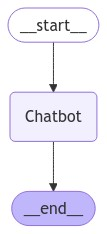

In [15]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [22]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "q"]:
        print("Good Bye")
        break
    # Format the input properly as a list of tuples
    state = {'messages': [('user', user_input)]}

    # Stream through the graph
    for event in graph.stream(state):
        for value in event.values():
            # Access the content attribute using dot notation
            print("Assistant:", value['messages'].content)

User: Hello
Assistant: Hello! 👋  How can I help you today? 😊

User: what is generative AI
Assistant: Generative AI is a type of artificial intelligence that focuses on creating new content. 

Instead of simply analyzing existing data like traditional AI, generative AI learns the underlying patterns and structures within that data and uses that knowledge to produce something original. 

Think of it like this:

* **Traditional AI:**  Recognizes a cat in a picture.
* **Generative AI:**  Creates a new picture of a cat that doesn't exist anywhere else.

Here are some key things to know about generative AI:

* **Types of Content:**  Generative AI can create a wide range of content, including:
    * **Text:**  Stories, poems, articles, code, dialogue
    * **Images:**  Photos, paintings, illustrations
    * **Audio:**  Music, sound effects, voiceovers
    * **Video:**  Short clips, animations
    * **3D Models:**  Objects, characters, environments
* **How it Works:** Generative AI models are 